In [1]:
import pandas as pd

# Load the dataset
file_path = 'datasets/heart_dataset.csv'
heart_data = pd.read_csv(file_path)

# Display basic information about the dataset
heart_data_info = heart_data.info()
heart_data_head = heart_data.head()

heart_data_info, heart_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(None,
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 2   37   M           ATA        130          283          0         ST     98   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 
   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
 0              N      0.0       Up             0  
 1              N      1.0     Flat             1  
 2              N      0.0       Up             0  
 3              Y      1.5     Flat             1  
 4              N      0.0       Up             0  )

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Identifying the nominal features that need to be converted
nominal_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Preparing the ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('nom', OneHotEncoder(), nominal_features)
    ], remainder='passthrough')

# Applying the transformation to the dataset
X = heart_data.drop('HeartDisease', axis=1)  # Features
y = heart_data['HeartDisease']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply the transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_transformed = preprocessor.fit_transform(X)

X_train_transformed.shape, X_test_transformed.shape

((642, 20), (276, 20))

In [3]:
# Baseline classifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test_transformed)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8804347826086957,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.86       112\n           1       0.92      0.88      0.90       164\n\n    accuracy                           0.88       276\n   macro avg       0.87      0.88      0.88       276\nweighted avg       0.88      0.88      0.88       276\n')

In [4]:
# Question 1 

import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # SVC with linear kernel is equivalent to LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# GaussianNB
scores_gnb = cross_val_score(GaussianNB(), X_transformed, y, cv=10)
print(f"GaussianNB Accuracy: {scores_gnb.mean():.2f} (+/- {scores_gnb.std() * 2:.2f})")

# Linear SVC
scores_svc = cross_val_score(SVC(kernel='linear', probability=True), X_transformed, y, cv=10)
print(f"Linear SVC Accuracy: {scores_svc.mean():.2f} (+/- {scores_svc.std() * 2:.2f})")

# MLPClassifier
scores_mlp = cross_val_score(MLPClassifier(), X_transformed, y, cv=10)
print(f"MLPClassifier Accuracy: {scores_mlp.mean():.2f} (+/- {scores_mlp.std() * 2:.2f})")

# DecisionTreeClassifier
scores_dt = cross_val_score(DecisionTreeClassifier(), X_transformed, y, cv=10)
print(f"DecisionTreeClassifier Accuracy: {scores_dt.mean():.2f} (+/- {scores_dt.std() * 2:.2f})")


GaussianNB Accuracy: 0.85 (+/- 0.10)
Linear SVC Accuracy: 0.85 (+/- 0.12)
MLPClassifier Accuracy: 0.85 (+/- 0.11)
DecisionTreeClassifier Accuracy: 0.78 (+/- 0.09)


In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForestClassifier Accuracy: {accuracy_rf:.2f}")


RandomForestClassifier Accuracy: 0.88


In [6]:
# Question 2

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Ensemble creation function
def create_ensemble(Classifier, n_estimators, **kwargs):
    ensemble = [Classifier(**kwargs) for _ in range(n_estimators)]
    return ensemble

# Create ensembles
ensemble_gnb = create_ensemble(GaussianNB, 100)
ensemble_svc = create_ensemble(SVC, 100, kernel='linear', probability=True)
ensemble_mlp = create_ensemble(MLPClassifier, 100, hidden_layer_sizes=(3, 3), max_iter=30, tol=1e-1)
ensemble_dt = create_ensemble(DecisionTreeClassifier, 100, max_depth=5, max_features=5)

# Function to evaluate the first classifier in the ensemble
def evaluate_first_classifier(ensemble, X_train, X_test, y_train, y_test):
    first_clf = ensemble[0]
    first_clf.fit(X_train, y_train)
    y_pred = first_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate and print the performance of the first classifier in each ensemble
accuracy_gnb = evaluate_first_classifier(ensemble_gnb, X_train, X_test, y_train, y_test)
accuracy_svc = evaluate_first_classifier(ensemble_svc, X_train, X_test, y_train, y_test)
accuracy_mlp = evaluate_first_classifier(ensemble_mlp, X_train, X_test, y_train, y_test)
accuracy_dt = evaluate_first_classifier(ensemble_dt, X_train, X_test, y_train, y_test)

print(f"First GaussianNB Classifier Accuracy: {accuracy_gnb:.2f}")
print(f"First Linear SVC Classifier Accuracy: {accuracy_svc:.2f}")
print(f"First MLPClassifier Accuracy: {accuracy_mlp:.2f}")
print(f"First DecisionTreeClassifier Accuracy: {accuracy_dt:.2f}")


First GaussianNB Classifier Accuracy: 0.88
First Linear SVC Classifier Accuracy: 0.87
First MLPClassifier Accuracy: 0.41
First DecisionTreeClassifier Accuracy: 0.83


In [7]:
# Question 3

import random

def ensemble_fit(ensemble, X_train, y_train, subset_size=0.8):
    """
    Trains each classifier in the ensemble on a different subset of the training data.
    
    :param ensemble: List of classifiers
    :param X_train: Training data features
    :param y_train: Training data labels
    :param subset_size: Fraction of training data to use for each classifier (default is 0.8)
    """
    n_samples = int(len(X_train) * subset_size)
    n_train = len(X_train)

    for clf in ensemble:
        # Randomly select indices for the subset
        subset_indices = random.sample(range(n_train), n_samples)

        # Create the subset of the training data
        X_train_subset = X_train[subset_indices]
        y_train_subset = y_train[subset_indices]

        # Train the classifier on the subset
        clf.fit(X_train_subset, y_train_subset)

In [8]:
# Question 4 

import numpy as np

def ensemble_predict(ensemble, X):
    """
    Predicts the class for each observation in X, based on an ensemble of classifiers.
    
    :param ensemble: List of trained classifiers
    :param X: Observations to predict
    :return: Predicted classes for each observation
    """
    # Sum of probabilities from all classifiers for each class
    sum_of_probabilities = np.sum([clf.predict_proba(X) for clf in ensemble], axis=0)

    # Final prediction is the class with the highest summed probability
    predictions = np.argmax(sum_of_probabilities, axis=1)
    return predictions


In [9]:
# Question 5

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score

# Convert your DataFrame to numpy arrays if they are not already
X_transformed_np = X_transformed.values if isinstance(X_transformed, pd.DataFrame) else X_transformed
y_np = y.values if isinstance(y, pd.Series) else y


def ensemble_fit_cv(ensemble, X_train, y_train, subsample_ratio):
    n_splits = 10
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kf.split(X_train, y_train):
        X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
        y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

        fitted_clfs = []
        for clf in ensemble:
            subsample_size = int(len(X_train_kf) * subsample_ratio)
            # Stratified subsampling
            _, subsample_indices = next(StratifiedKFold(n_splits=2, shuffle=True, random_state=42).split(X_train_kf, y_train_kf))
            subsample_indices = subsample_indices[:subsample_size]
            clf_clone = clone(clf)
            clf_clone.fit(X_train_kf[subsample_indices], y_train_kf[subsample_indices])
            fitted_clfs.append(clf_clone)

        # Aggregate predictions from the fitted classifiers and evaluate
        predictions = np.array([clf.predict(X_test_kf) for clf in fitted_clfs])
        final_prediction = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, minlength=np.max(y_train)+1)), axis=0, arr=predictions)
        score = accuracy_score(y_test_kf, final_prediction)
        scores.append(score)

    return np.mean(scores), np.std(scores)



# Evaluate ensembles with subsample ratio of 0.2
ensemble_gnb_score_02 = ensemble_fit_cv(ensemble_gnb, X_transformed_np, y_np, subsample_ratio=0.2)
ensemble_svc_score_02 = ensemble_fit_cv(ensemble_svc, X_transformed_np, y_np, subsample_ratio=0.2)
ensemble_mlp_score_02 = ensemble_fit_cv(ensemble_mlp, X_transformed_np, y_np, subsample_ratio=0.2)
ensemble_dt_score_02 = ensemble_fit_cv(ensemble_dt, X_transformed_np, y_np, subsample_ratio=0.2)

# Print the results for subsample ratio of 0.2
print(f"Ensemble GaussianNB (0.2) CV Score: {ensemble_gnb_score_02}")
print(f"Ensemble SVC (0.2) CV Score: {ensemble_svc_score_02}")
print(f"Ensemble MLP (0.2) CV Score: {ensemble_mlp_score_02}")
print(f"Ensemble Decision Tree (0.2) CV Score: {ensemble_dt_score_02}")

# Repeat the evaluations with subsample ratio of 0.05
ensemble_gnb_score_005 = ensemble_fit_cv(ensemble_gnb, X_transformed_np, y_np, subsample_ratio=0.05)
ensemble_svc_score_005 = ensemble_fit_cv(ensemble_svc, X_transformed_np, y_np, subsample_ratio=0.05)
ensemble_mlp_score_005 = ensemble_fit_cv(ensemble_mlp, X_transformed_np, y_np, subsample_ratio=0.05)
ensemble_dt_score_005 = ensemble_fit_cv(ensemble_dt, X_transformed_np, y_np, subsample_ratio=0.05)

# Print the results for subsample ratio of 0.05
print(f"Ensemble GaussianNB (0.05) CV Score: {ensemble_gnb_score_005}")
print(f"Ensemble SVC (0.05) CV Score: {ensemble_svc_score_005}")
print(f"Ensemble MLP (0.05) CV Score: {ensemble_mlp_score_005}")
print(f"Ensemble Decision Tree (0.05) CV Score: {ensemble_dt_score_005}")


/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
 

Ensemble GaussianNB (0.2) CV Score: (0.8180363115145723, 0.04979946770462347)
Ensemble SVC (0.2) CV Score: (0.7984233158146201, 0.04354381474352377)
Ensemble MLP (0.2) CV Score: (0.48694457716196843, 0.054107274670283326)
Ensemble Decision Tree (0.2) CV Score: (0.8256569517439083, 0.03886106088275578)


/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
 

Ensemble GaussianNB (0.05) CV Score: (0.6797300525561395, 0.058201306312826696)
Ensemble SVC (0.05) CV Score: (0.7525919732441473, 0.03809294203229811)
Ensemble MLP (0.05) CV Score: (0.5205446727185858, 0.06334913223386372)
Ensemble Decision Tree (0.05) CV Score: (0.7766125179168657, 0.04062901173709349)


/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/shatakshishewale/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
 

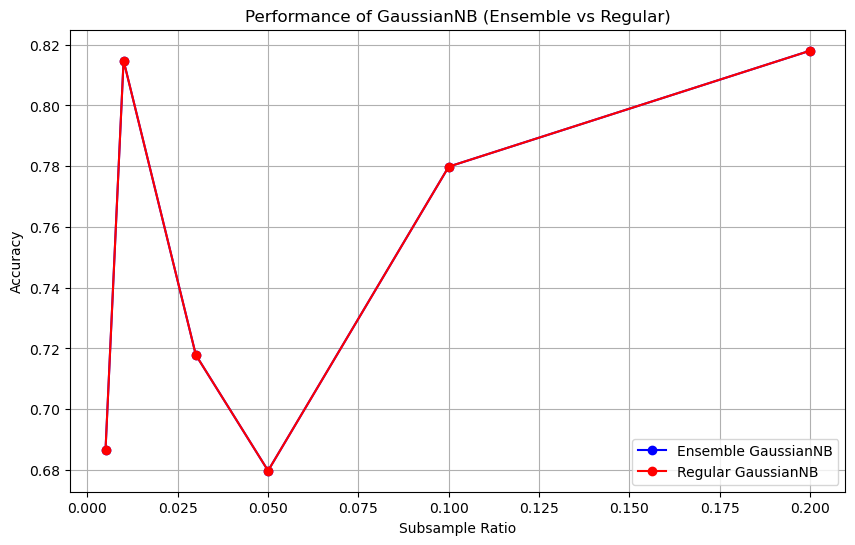

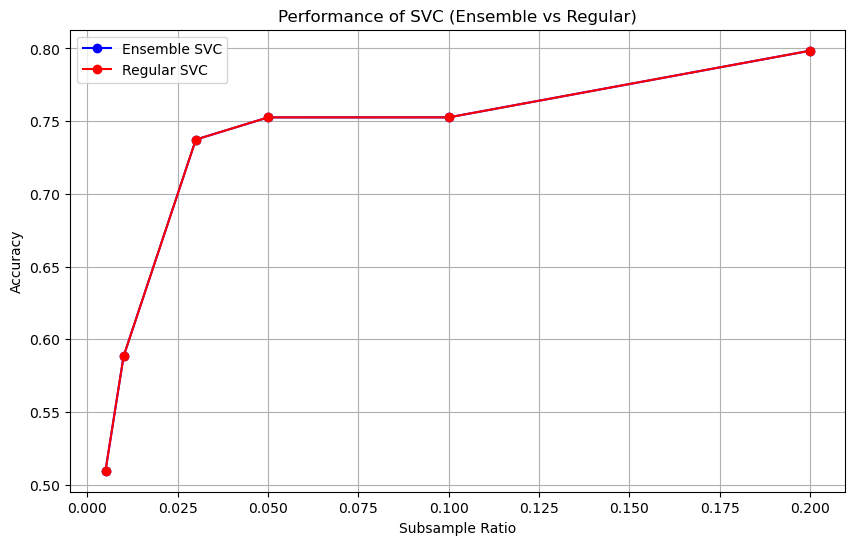

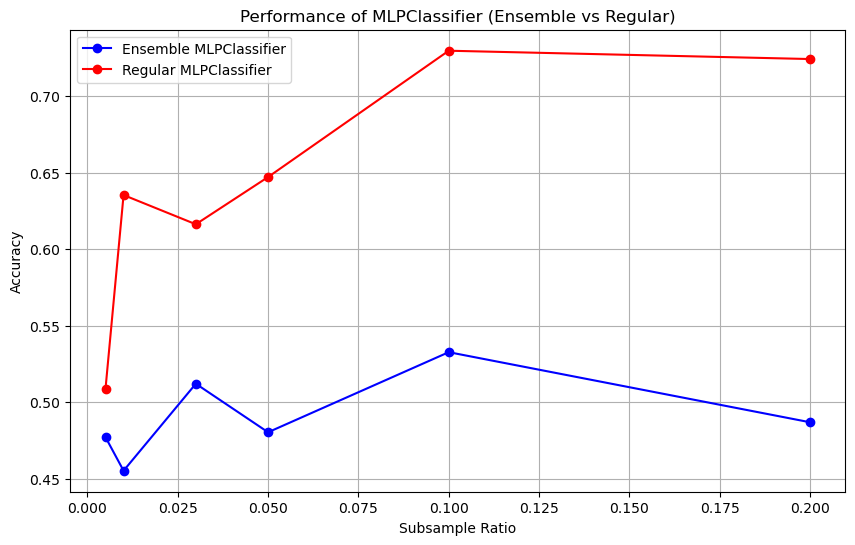

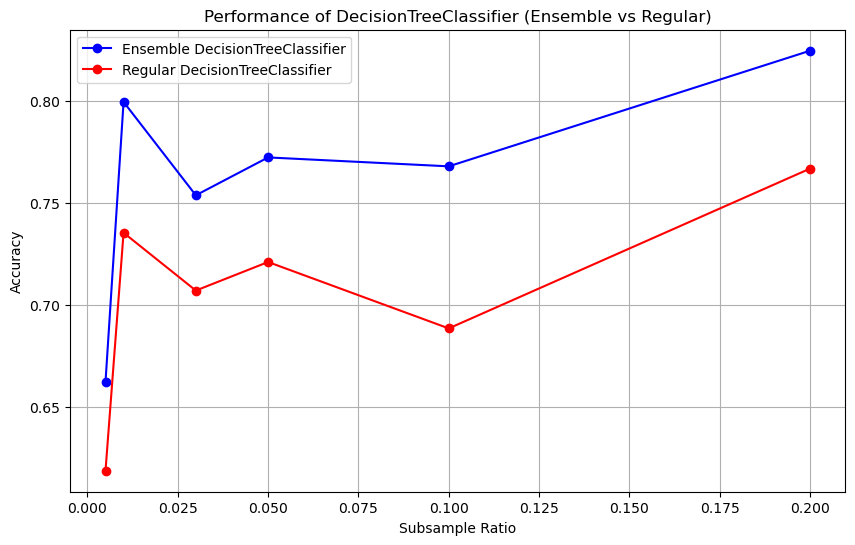

In [10]:
# Question 6 and 7

import matplotlib.pyplot as plt

subsample_ratios = [0.005, 0.01, 0.03, 0.05, 0.1, 0.2]

# Initialize dictionaries to store scores
ensemble_scores = {clf: [] for clf in ['GaussianNB', 'SVC', 'MLPClassifier', 'DecisionTreeClassifier']}
regular_scores = {clf: [] for clf in ['GaussianNB', 'SVC', 'MLPClassifier', 'DecisionTreeClassifier']}

# Evaluate ensembles and regular classifiers
for ratio in subsample_ratios:
    ensemble_scores['GaussianNB'].append(ensemble_fit_cv(ensemble_gnb, X_transformed_np, y_np, subsample_ratio=ratio))
    ensemble_scores['SVC'].append(ensemble_fit_cv(ensemble_svc, X_transformed_np, y_np, subsample_ratio=ratio))
    ensemble_scores['MLPClassifier'].append(ensemble_fit_cv(ensemble_mlp, X_transformed_np, y_np, subsample_ratio=ratio))
    ensemble_scores['DecisionTreeClassifier'].append(ensemble_fit_cv(ensemble_dt, X_transformed_np, y_np, subsample_ratio=ratio))

    regular_scores['GaussianNB'].append(ensemble_fit_cv([GaussianNB()], X_transformed_np, y_np, subsample_ratio=ratio))
    regular_scores['SVC'].append(ensemble_fit_cv([SVC(kernel='linear', probability=True)], X_transformed_np, y_np, subsample_ratio=ratio))
    regular_scores['MLPClassifier'].append(ensemble_fit_cv([MLPClassifier()], X_transformed_np, y_np, subsample_ratio=ratio))
    regular_scores['DecisionTreeClassifier'].append(ensemble_fit_cv([DecisionTreeClassifier()], X_transformed_np, y_np, subsample_ratio=ratio))

# Plotting
for clf in regular_scores:
    plt.figure(figsize=(10, 6))
    ensemble_mean_scores = [score[0] for score in ensemble_scores[clf]]
    regular_mean_scores = [score[0] for score in regular_scores[clf]]

    plt.plot(subsample_ratios, ensemble_mean_scores, label=f'Ensemble {clf}', marker='o', color='blue')
    plt.plot(subsample_ratios, regular_mean_scores, label=f'Regular {clf}', marker='o', color='red')

    plt.xlabel('Subsample Ratio')
    plt.ylabel('Accuracy')
    plt.title(f'Performance of {clf} (Ensemble vs Regular)')
    plt.legend()
    plt.grid(True)
    plt.show()


**Question 7 plot analysis**

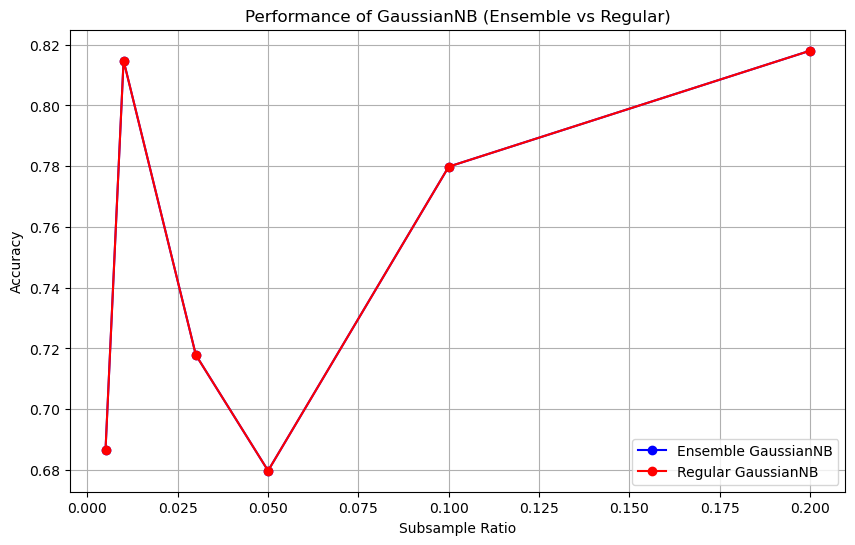

General Trend: The plot shows an overall increasing trend in accuracy as the subsample ratio increases for both ensemble and regular classifiers. This suggests that having more data to train on generally improves the model's performance, which is a typical behavior in machine learning.

Performance Dip: There is a notable dip in accuracy for both classifiers at a subsample ratio of 0.025. This could indicate a specific characteristic of the data subset used at this ratio, which is more challenging for the model to learn from.

Overlapping Lines: The lines for the ensemble and regular classifiers are overlapping or very close together, which suggests that the ensemble method is not providing a substantial improvement over the regular method for this particular dataset and classifier.

High Subsample Ratio Performance: At higher subsample ratios (0.1 and above), the accuracy improves significantly, and the ensemble method seems to converge with the regular method. This implies that, given enough data, the simple GaussianNB classifier is performing just as well as an ensemble of GaussianNB classifiers.

Regular Classifier Strength: The regular GaussianNB classifier seems quite robust on its own, as it performs on par with the ensemble across all subsample ratios. This could mean that the base classifier is already performing near its capacity, and the ensemble method is not exploiting any additional complexity or patterns in the data.

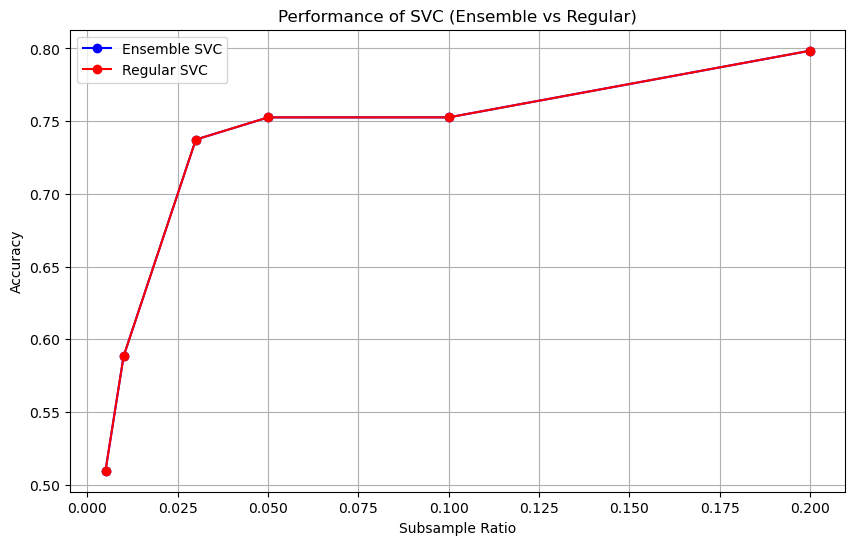

Similar to the GaussianNB plot, both the ensemble and the regular SVC show an improvement in accuracy as the subsample ratio increases. This trend suggests that the model benefits from more training data, which is common in machine learning.

1. Performance Convergence: At lower subsample ratios, there is a more noticeable difference between the ensemble and the regular classifiers, with the ensemble starting lower but quickly converging to similar performance as the subsample ratio increases. This might indicate that the ensemble method is able to leverage more data more effectively than the regular classifier, but once a certain amount of data is reached, the advantage diminishes.

2. Lower Subsample Ratios: At the lowest subsample ratio (0.005), the accuracy of both classifiers is notably lower. This could be due to insufficient data to capture the complexity of the problem, leading to underfitting.

3. Robustness at Higher Ratios: As the subsample ratio increases to 0.1 and above, both the ensemble and regular classifiers display robustness in accuracy, with both achieving similar high accuracy levels. This may imply that with enough data, the SVC, which is already a powerful classifier, doesn't gain additional benefits from the ensemble approach.

4. Potential Overfitting: The ensemble SVC starts with a lower accuracy at the smallest subsample ratio compared to the regular SVC. This could be a sign of overfitting, where the ensemble method is too sensitive to the noise within the smaller training set. As more data is provided, the ensemble's model generalizes better, closing the gap with the regular classifier.


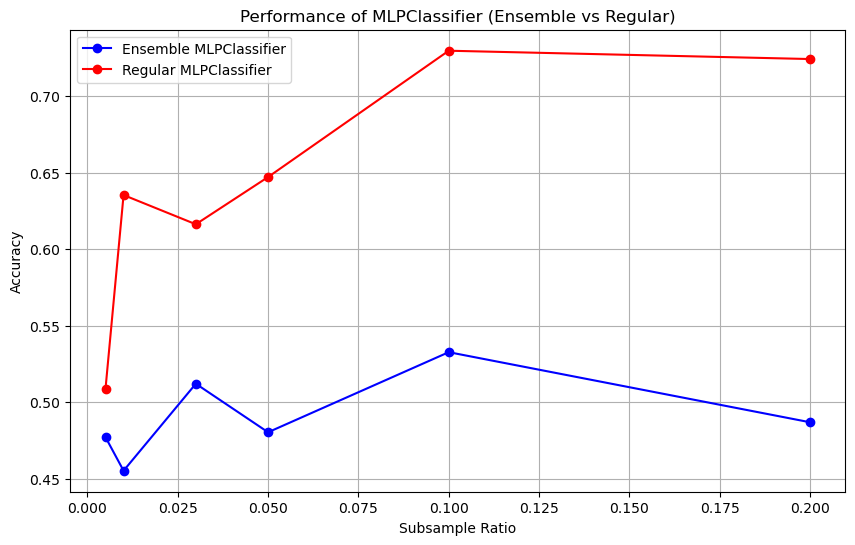

1. Ensemble Variability: The ensemble MLPClassifier displays a significant amount of variability in performance, with the accuracy increasing sharply from the lowest to the second-lowest subsample ratio, then decreasing before rising again. This could be due to the stochastic nature of neural networks and the impact of different subsets of data on the training process.

2. Performance Plateau: The regular MLPClassifier's performance increases steadily with the subsample ratio and plateaus at a subsample ratio of 0.05 and above. This suggests that beyond a certain point, additional training data does not contribute to significant improvements in accuracy for this classifier.

3. Ensemble vs. Regular: At the highest subsample ratio of 0.2, the regular MLPClassifier outperforms the ensemble version. This could imply that the complexity added by the ensemble method is not beneficial when sufficient training data is provided to a well-tuned regular MLPClassifier.

4. Ensemble Peak Performance: The ensemble MLPClassifier reaches its peak performance at a subsample ratio of 0.1. This peak is followed by a decline, which could indicate overfitting at higher subsample ratios, where the model may be too complex for the amount of data or the variance within the ensemble members is too high.

5. Robustness of Regular Classifier: The regular MLPClassifier demonstrates robustness in its performance, with less variability across the different subsample ratios. This stability could be valuable in practice, where predictability and reliability of performance are important.

6. Data Sufficiency: The sharp increase in accuracy from the lowest subsample ratio for both ensemble and regular classifiers indicates that the very low amount of data at the 0.005 ratio is not sufficient to capture the complexity of the data and model the problem adequately.

7. Model Sensitivity: Neural networks are sensitive to the amount of data and can easily overfit or underfit depending on the situation. The plot suggests that the ensemble MLPClassifiers might require careful tuning of parameters to stabilize performance across different subsample ratios.

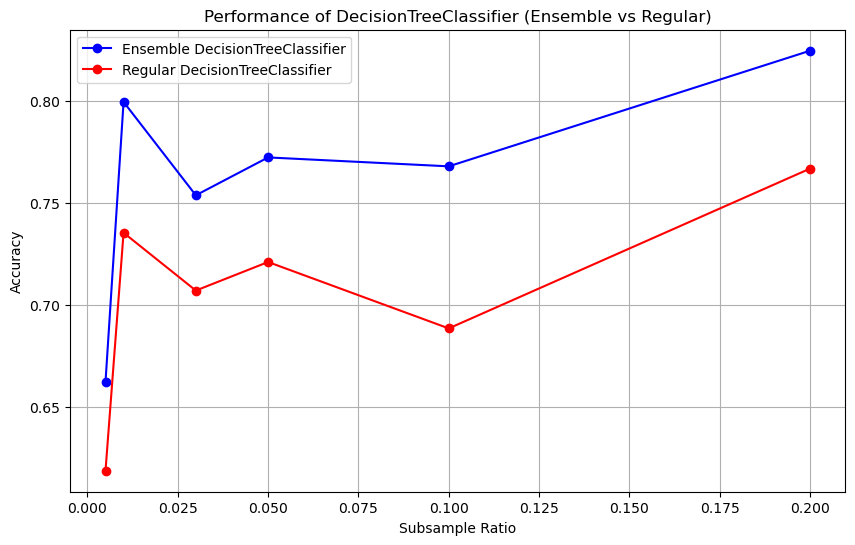

1. Increasing Trend: There is a clear increasing trend in accuracy as the subsample ratio increases for both ensemble and regular classifiers. This suggests that more data generally leads to better performance for decision tree models.

2. Higher Performance for Ensemble: The ensemble DecisionTreeClassifier outperforms the regular DecisionTreeClassifier at each subsample ratio. This indicates the effectiveness of the ensemble approach in improving the overall predictive performance for decision trees.

3. Ensemble Stability: The ensemble classifier shows more stability in accuracy across different subsample ratios compared to the regular classifier. This could be due to the ensemble's ability to average out errors and reduce variance.

4. Dip in Regular Classifier's Performance: There's a noticeable dip in the performance of the regular DecisionTreeClassifier at a subsample ratio of 0.1, which is not present in the ensemble's performance. This could be due to a specific subset of data at this ratio that negatively affects the regular classifier's performance.

5. Ensemble's Diminishing Returns: Although the ensemble classifier's performance improves with more data, the rate of improvement slows down after a subsample ratio of 0.1. This suggests that there might be a point of diminishing returns where adding more data yields lesser improvements.

Overall, the ensemble DecisionTreeClassifier demonstrates the benefits of combining multiple models to improve prediction accuracy and stability.